In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
dfs=pd.read_csv("car data.csv")

In [86]:
dfs.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


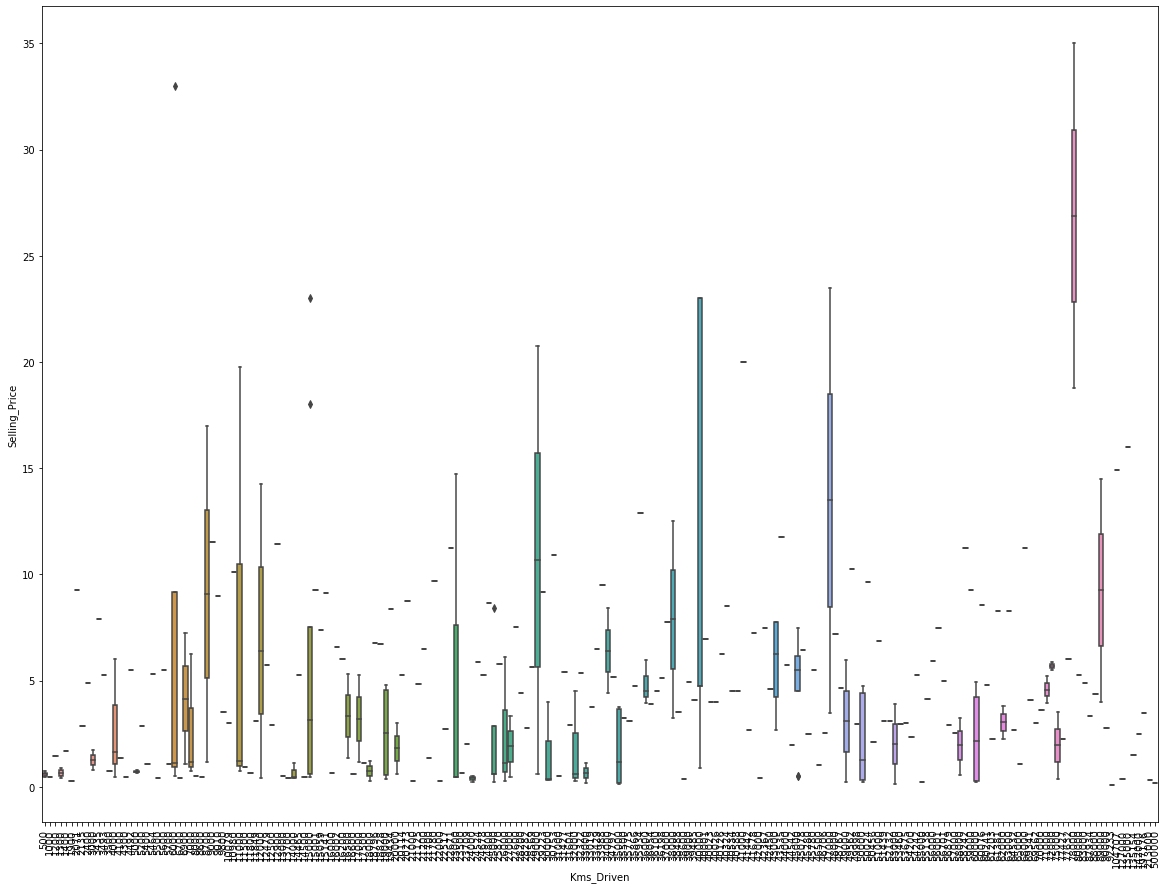

In [87]:
plt.figure(figsize=(20,15))
sns.boxplot(x="Kms_Driven",y="Selling_Price",data=dfs)
plt.xticks(rotation=90)
plt.show()

In [88]:
dfs['Current Year'] = 2020

In [89]:
dfs['Years Old'] = dfs['Current Year'] - dfs['Year']

In [90]:
dfs = dfs.drop(columns=['Current Year', 'Year','Car_Name'])

In [91]:
dfs.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [92]:
dfs.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [93]:
len(dfs.select_dtypes(include='object').columns)

3

In [94]:
dfs['Fuel_Type'].nunique()

3

In [95]:
dfs['Seller_Type'].nunique()

2

In [96]:
dfs['Transmission'].nunique()

2

In [97]:
dfs = pd.get_dummies(data=dfs, drop_first=True)

In [98]:
dfs.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [99]:
x=dfs.drop(columns="Selling_Price")
y=dfs["Selling_Price"]

<AxesSubplot:title={'center':'Correlated with Selling Price'}>

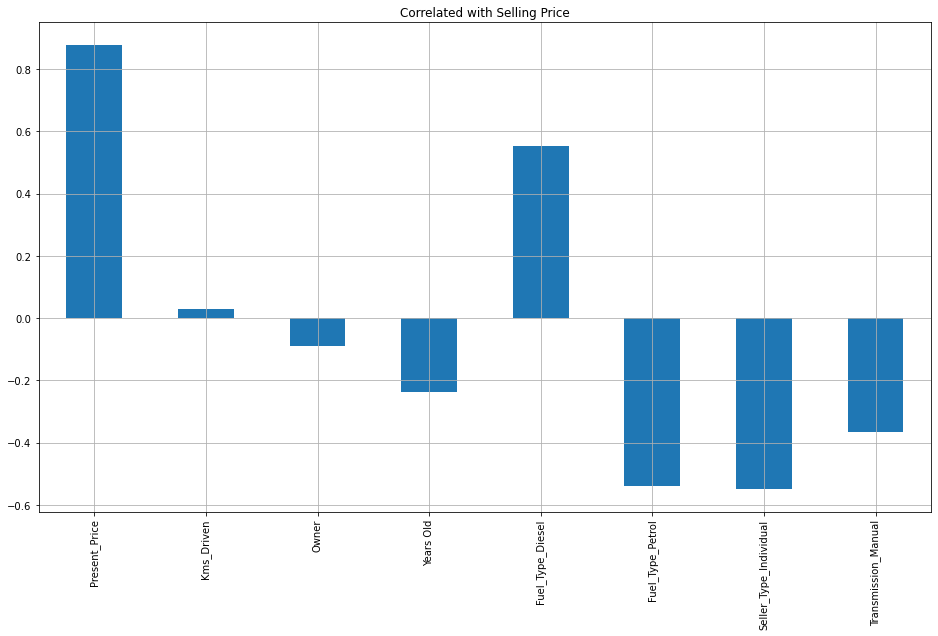

In [100]:
x.corrwith(y).plot.bar(
    figsize=(16,9), title='Correlated with Selling Price', grid=True
)

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [102]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [103]:
y_pred = regressor_mlr.predict(x_test)

In [104]:
from sklearn.metrics import r2_score

In [105]:
r2_score(y_test, y_pred)

0.9144342972228521

In [106]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [107]:
y_pred = regressor_rf.predict(x_test)

In [108]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9570064867262735